<a href="https://colab.research.google.com/github/richbello/sena_ggpc/blob/main/BancodeEvaluadores_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Banco de Evaluadores DEF.xlsx to Banco de Evaluadores DEF.xlsx


In [3]:
import pandas as pd

# Lee el archivo Excel (ajusta el nombre si cambia)
df = pd.read_excel("Banco de Evaluadores DEF.xlsx")

# Muestra las primeras filas
df.head()


,AÑO PARTICIPACIÓN,MODALIDAD\nPARTICIPACIÓN,CC,NOMBRE DEL EVALUADOR,REGIONAL,MUNICIPIO,NOMBRE CENTRO,CORREO INSTITUCIONAL,CELULAR,ROL,PROCESO,ESTADO
0,2019,PRESENCIAL,12548470,MANUEL JOSÉ MONTERO VIZCAINO,MAGDALENA,SANTA MARTA,DIRECIÓN REGIONAL,mmonterov@sena.edu.co,3183378189,NO IDENTIFICADO,FCE,ACTIVO
1,2019,PRESENCIAL,79474255,MANUEL PINZÓN CANDELARIO,RISARALDA,PEREIRA,CENTRO DE COMERCIO Y SERVICIOS,mapinzon@sena.edu.co,3008053637,NO IDENTIFICADO,FCE,ACTIVO
2,2019,PRESENCIAL,40797966,MARIETH ORCASITAS PEÑALOZA,GUAJIRA,RIOHACHA,CENTRO INDUSTRIAL Y DE ENERGÍAS ALTERNATIVAS,morcasitas@sena.edu.co,3043752857,NO IDENTIFICADO,FCE,ACTIVO
3,2019,PRESENCIAL,36304214,MONICA ALEXANDRA LAGOS SERRATO,HUILA,PITALITO,CENTRO DE GESTIÓN Y DESARROLLO SOSTENIBLE SURC...,mlagos@misena.edu.co,3168747156,NO IDENTIFICADO,FCE,ACTIVO
4,2019,PRESENCIAL,32798056,TERESA DE JESUS ALTAMAR PEREZ,ATLÁNTICO,SABANALARGA,CENTRO PARA EL DESARROLLO AGROECOLÓGICO Y AGRO...,taltamarp@sena.edu.co; teresa.altamar@misena.e...,3004977972,NO IDENTIFICADO,FCE,INACTIVO


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Limpiar nombres de columnas
df.columns = df.columns.str.strip().str.upper().str.replace('\n', ' ')

# Renombrar columnas clave para facilitar análisis
df = df.rename(columns={
    "AÑO PARTICIPACIÓN": "AÑO",
    "MODALIDAD PARTICIPACIÓN": "MODALIDAD",
    "REGIONAL": "REGIONAL",
    "MUNICIPIO": "MUNICIPIO",
    "ROL": "ROL",
    "PROCESO": "PROCESO"
})

# Revisar resumen de valores únicos por columna clave
columnas_interes = ["AÑO", "MODALIDAD", "REGIONAL", "MUNICIPIO", "PROCESO", "ROL"]
resumen_unicos = {col: df[col].nunique() for col in columnas_interes}
resumen_unicos


{'AÑO': 9,
 'MODALIDAD': 3,
 'REGIONAL': 30,
 'MUNICIPIO': 60,
 'PROCESO': 5,
 'ROL': 6}

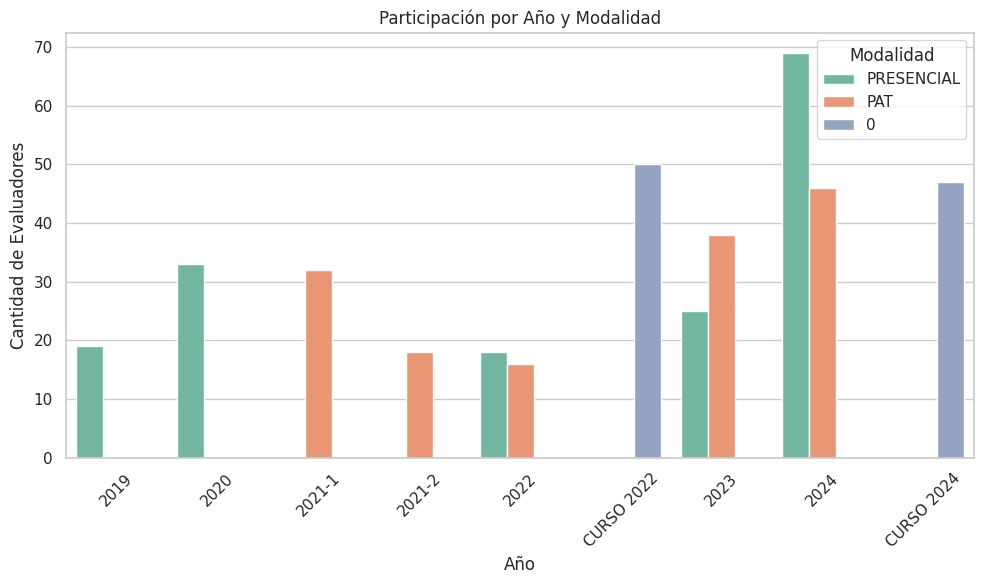

In [6]:
# Configuración de estilo
sns.set(style="whitegrid", palette="Set2")

# Gráfica 1: Evolución anual por modalidad
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="AÑO", hue="MODALIDAD")
plt.title("Participación por Año y Modalidad")
plt.xlabel("Año")
plt.ylabel("Cantidad de Evaluadores")
plt.legend(title="Modalidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


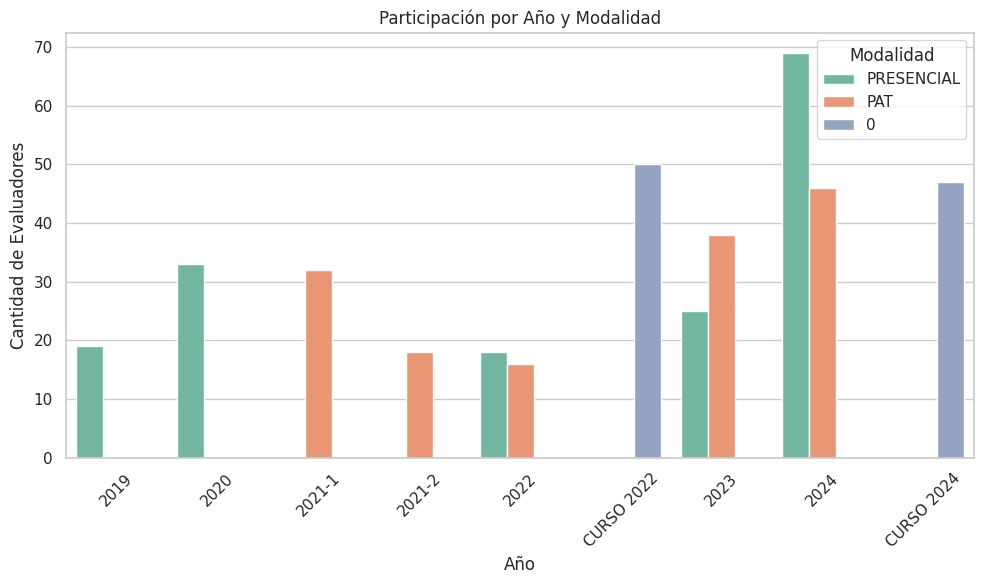

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo
sns.set(style="whitegrid", palette="Set2")

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="AÑO", hue="MODALIDAD")
plt.title("Participación por Año y Modalidad")
plt.xlabel("Año")
plt.ylabel("Cantidad de Evaluadores")
plt.legend(title="Modalidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


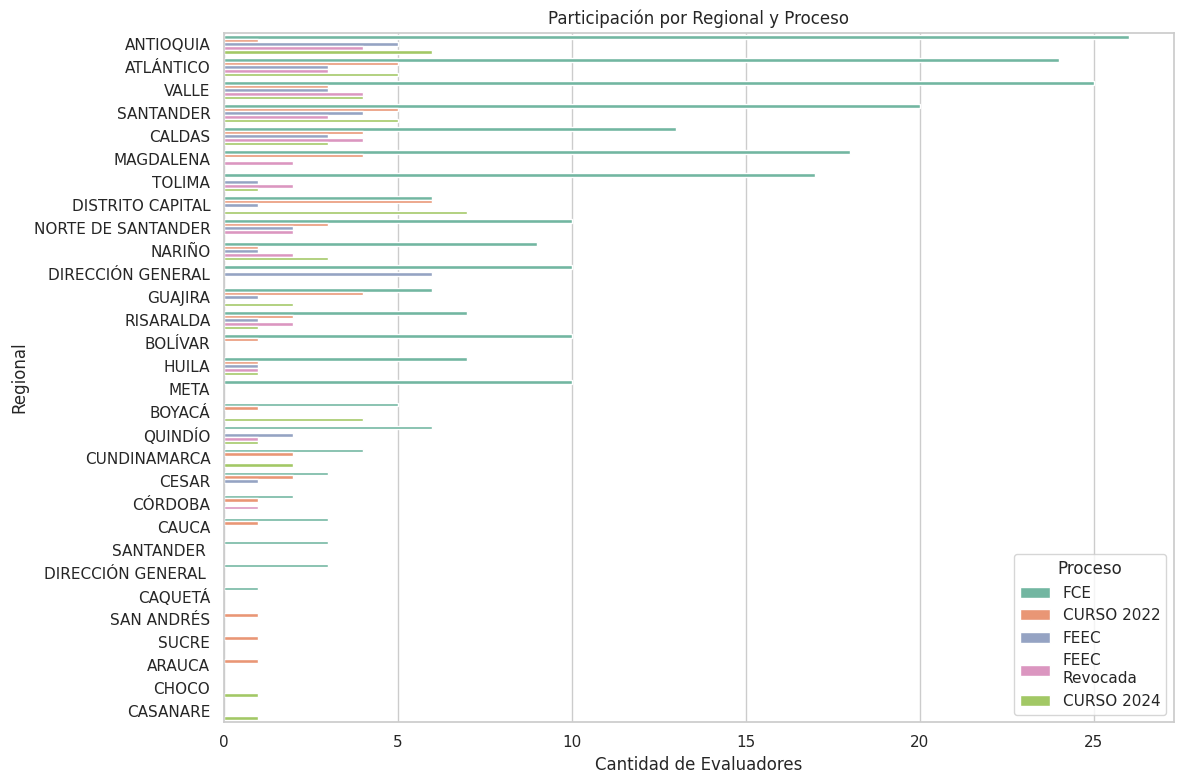

In [8]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y="REGIONAL", hue="PROCESO", order=df["REGIONAL"].value_counts().index)
plt.title("Participación por Regional y Proceso")
plt.xlabel("Cantidad de Evaluadores")
plt.ylabel("Regional")
plt.legend(title="Proceso")
plt.tight_layout()
plt.show()


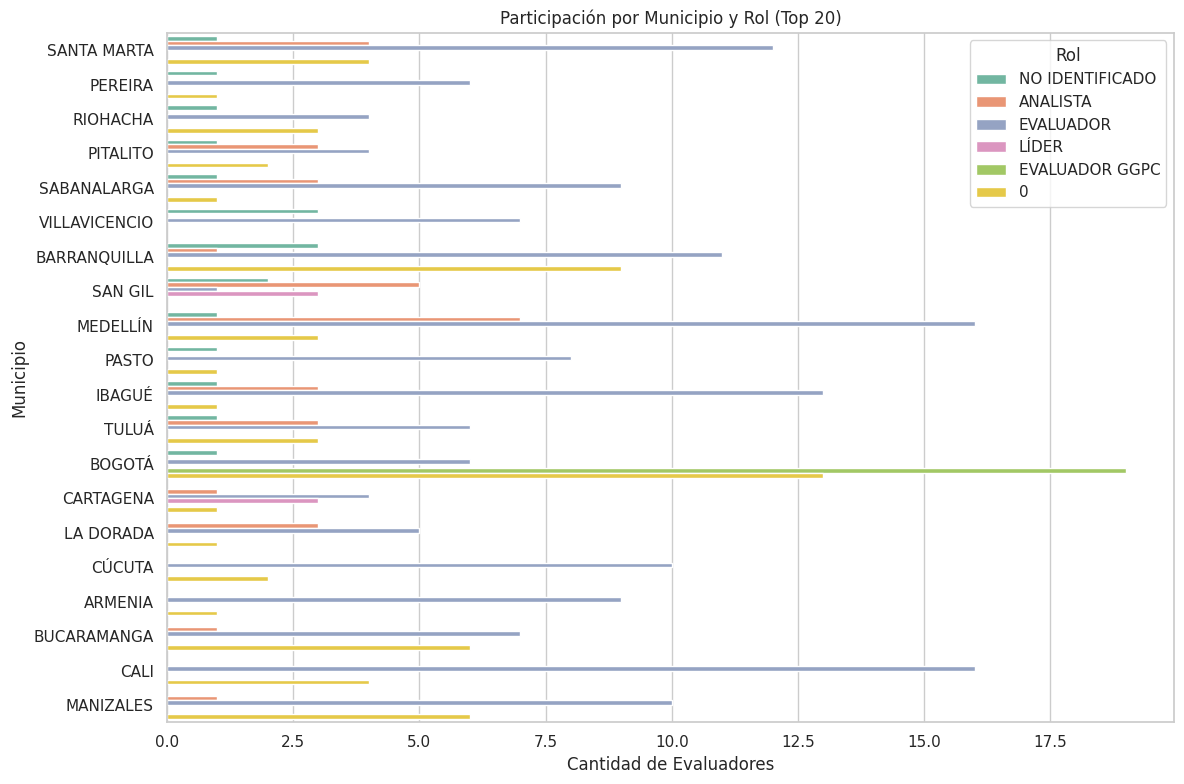

In [9]:
top_municipios = df["MUNICIPIO"].value_counts().nlargest(20).index
plt.figure(figsize=(12, 8))
sns.countplot(data=df[df["MUNICIPIO"].isin(top_municipios)], y="MUNICIPIO", hue="ROL")
plt.title("Participación por Municipio y Rol (Top 20)")
plt.xlabel("Cantidad de Evaluadores")
plt.ylabel("Municipio")
plt.legend(title="Rol")
plt.tight_layout()
plt.show()
